## Environment

In [1]:
import numpy as np                                            # To perform numerical operations
import pandas as pd                                           # Perform data processing
import matplotlib.pyplot as plt                               # For data visualization
import seaborn as sns                                         # For data visualization
from sklearn.model_selection import train_test_split          # To seperate features and label
from sklearn.linear_model import LinearRegression             # Model
from sklearn.linear_model import Lasso                        # Model
from sklearn import metrics                                   # To evaluate model
import pickle                                                 # To save the model

## Data Preprocessing

In [2]:
# Loading the data

car_data = pd.read_csv('car data.csv')

In [3]:
# Getting first 5 rows of the dataframe

car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# Getting last 5 roes of the dataframe

car_data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
# Printing shape of the dataframe

car_data.shape

(301, 9)

In [6]:
# Printing information of the dataframe

car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# Inspecting statistics of the dataframe

car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
# Checking any null values are present in the dataframe

car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
# Printing the distribution of the categorical features

print(car_data.Fuel_Type.value_counts())
print('*'*20)
print(car_data.Seller_Type.value_counts())
print('*'*20)
print(car_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
********************
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
********************
Manual       261
Automatic     40
Name: Transmission, dtype: int64


#### Encoding the Categorical Features

In [11]:
# Encoding Fuel Type

car_data.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)

# Encoding Seller Type

car_data.replace({'Seller_Type': {'Dealer': 0, 'Individual': 1}}, inplace=True)

# Encoding Transmission

car_data.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

In [12]:
car_data.sample(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
252,brio,2015,5.40,6.82,31427,0,0,1,0
276,city,2015,8.65,13.60,24800,0,0,0,0


## Train-Test Split

In [13]:
X = car_data.drop(columns=['Car_Name', 'Selling_Price'], axis=1)
Y = car_data['Selling_Price']

In [14]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [15]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(240, 7) (61, 7) (240,) (61,)


## Model Training

### Linear Regression

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train, Y_train)

LinearRegression()

## Model Evaluation

In [20]:
# Predictons on training data

train_data_pred = model.predict(X_train)

# R Squared Error

error_score = metrics.r2_score(Y_train, train_data_pred)
print("R Squared Error = ", error_score)

R Squared Error =  0.8839793496750804


### Visualization of Actual and Predicted Values of Training data

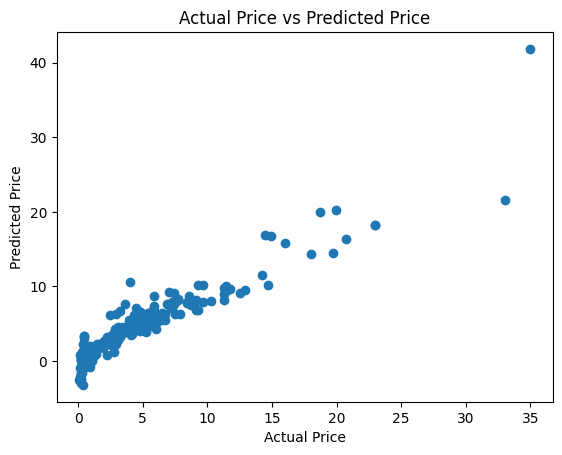

In [21]:
plt.scatter(Y_train, train_data_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [22]:
# Predictions on Testing Data

test_data_pred = model.predict(X_test)

# R Squared Error

error_score = metrics.r2_score(Y_test, test_data_pred)
print("R Squared Error = ", error_score)

R Squared Error =  0.8468053957656777


### Visualization of Actual and Predicted Values of Testing data

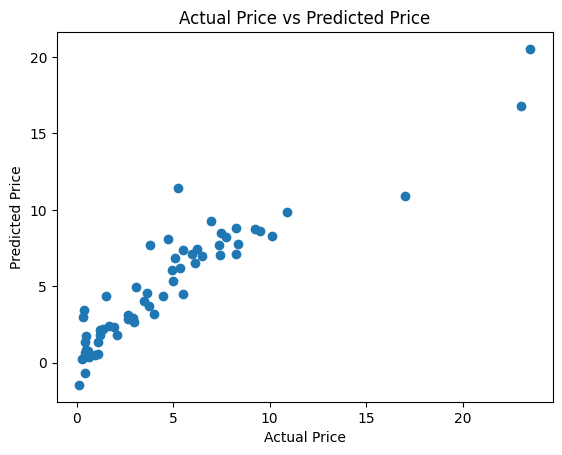

In [23]:
plt.scatter(Y_test, test_data_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

### Lasso Regression

In [24]:
model1 = Lasso()

In [25]:
model1.fit(X_train,Y_train)

Lasso()

In [26]:
# Model Evaluation on training data

train_data_pred = model1.predict(X_train)

# R Squared Error

error_score = metrics.r2_score(Y_train, train_data_pred)
print("R Squared Error = ", error_score)

R Squared Error =  0.848030286813716


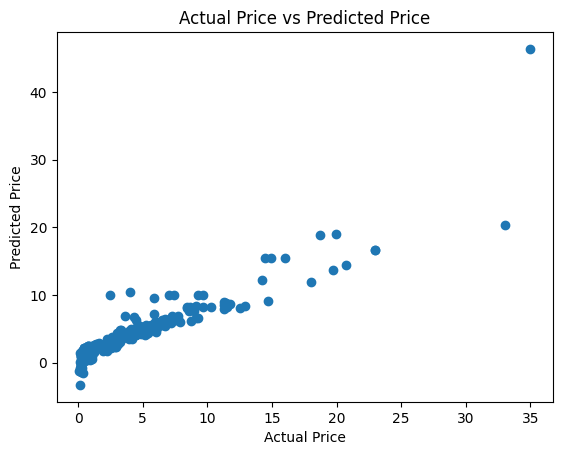

In [27]:
# Visualization of Actual and Predicted Values of Training data

plt.scatter(Y_train, train_data_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

In [28]:
# Predictions on Testing Data

test_data_pred = model1.predict(X_test)

# R Squared Error

error_score = metrics.r2_score(Y_test, test_data_pred)
print("R Squared Error = ", error_score)

R Squared Error =  0.7985512461284692


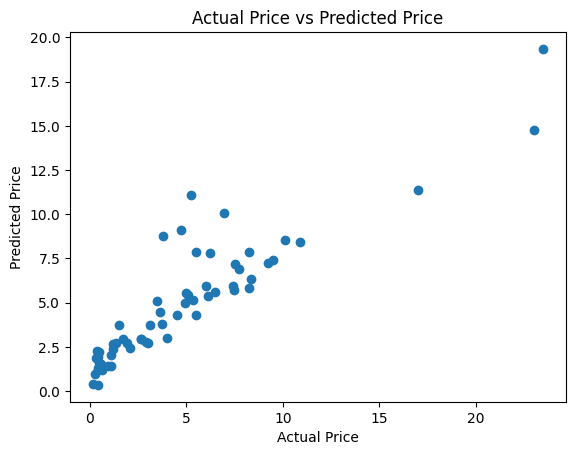

In [29]:
# Visualization of Actual and Predicted Values of Testing data

plt.scatter(Y_test, test_data_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

## Save Model

In [30]:
lr_model = 'LinearRegresson_Model.pkl'
with open(lr_model,'wb') as file:
    pickle.dump(model,file)

In [31]:
lasso_model = 'LassoRegression_Model.pkl'
with open(lasso_model,'wb') as file:
    pickle.dump(model1,file)